# WHAT MAKES GALAXIES BETTER OFF?
##### An analysis of the demographic and socio-economic variables that influence the Well-Being Index to find out which ones have the most determining influence

================================================================


## 1. Data Assessment and Cleaning

In [46]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Train Data

In [47]:
#viewing the train data
galaxies = pd.read_csv('Train_data.csv')
print('Shape:', galaxies.shape)
galaxies.head()

Shape: (3097, 81)


,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
0,10065,1002001,Antlia B,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041404
1,10087,999000,KKH 11 (ZOAG G135.74-04.53),0.970048,80.924094,11409.94296,0.757218,15.869798,13.065734,0.807108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098777
2,10141,993012,Leo IV Dwarf,0.995540,82.441006,58774.29343,1.032429,17.545117,11.399711,0.973684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200747
3,10168,995006,NGC 185,1.004362,75.635986,34960.41911,0.707776,13.578086,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.546539,NaN,0.562809,0.067170
4,10201,996004,Grus I,1.050627,83.412540,17073.45121,0.951402,13.518157,11.749071,0.965452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078351


In [48]:
#info on the train_data
galaxies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       3097 non-null   int64  
 1   galactic year                                                                            3097 non-null   int64  
 2   galaxy                                                                                   3097 non-null   object 
 3   existence expectancy index                                                               3096 non-null   float64
 4   existence expectancy at birth                                                            3096 non-null   float64
 5   Gross income per capita                                       

From the train-data summary:
- There are 81 features and 3097 rows
- The target feature is the Well-being index
- There are only 4 columns that do not have null values.
- All features have a float or integer d-type apart from 'galaxy'

##### Validation Data

In [49]:
# viewing the validation data
validation = pd.read_csv('Validation.csv')
print('Validation Data Shape:', validation.shape)
validation.head()

Validation Data Shape: (720, 81)


,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Predicted Well-Being Index
0,886447,1004004,Andromeda Galaxy (M31),0.803915,82.718434,17299.57148,0.691448,16.083635,11.282011,0.715746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,687564,1005006,Andromeda Galaxy (M31),0.860011,73.682279,24971.71631,0.669550,12.858577,10.493260,0.727915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,494935,1006009,Andromeda Galaxy (M31),0.810644,68.456526,15943.82977,0.766118,14.236676,9.962169,0.757072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,378919,1015056,Andromeda Galaxy (M31),0.837170,68.742404,20952.63665,0.757196,14.281498,10.329880,0.759207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.753738,NaN,NaN
4,421878,1004004,Andromeda I,0.749034,72.093220,30068.14043,0.641228,12.510524,7.132999,0.673619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# info on the validation data
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       720 non-null    int64  
 1   galactic year                                                                            720 non-null    int64  
 2   galaxy                                                                                   720 non-null    object 
 3   existence expectancy index                                                               720 non-null    float64
 4   existence expectancy at birth                                                            720 non-null    float64
 5   Gross income per capita                                         

From the validation data summary:
- There are 81 features and 720 rows
- The target feature is the Predicted Well-being index. However, it is full of nulls.
- There are only 8 columns that do not have null values.
- All features have a float or integer d-type apart from 'galaxy'

In [51]:
# Renaming the Predicted Well-Being column to match the train data
validation.rename(columns={'Predicted Well-Being Index': 'Well-Being Index'}, inplace=True)
validation

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
0,886447,1004004,Andromeda Galaxy (M31),0.803915,82.718434,17299.57148,0.691448,16.083635,11.282011,0.715746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,687564,1005006,Andromeda Galaxy (M31),0.860011,73.682279,24971.71631,0.669550,12.858577,10.493260,0.727915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,494935,1006009,Andromeda Galaxy (M31),0.810644,68.456526,15943.82977,0.766118,14.236676,9.962169,0.757072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,378919,1015056,Andromeda Galaxy (M31),0.837170,68.742404,20952.63665,0.757196,14.281498,10.329880,0.759207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.753738,NaN,NaN
4,421878,1004004,Andromeda I,0.749034,72.093220,30068.14043,0.641228,12.510524,7.132999,0.673619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,389587,1015056,Willman 1,1.010563,92.515213,61890.59381,1.219435,18.016207,13.395910,1.020538,...,0.942637,0.928915,1.038498,111.875906,92.223765,26.147343,3.203769,18.505791,0.406823,NaN
716,17112,1003002,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.628426,58.772174,26523.82527,0.572390,9.186143,3.807712,0.525476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,583782,1004004,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.603825,58.301528,10659.49479,0.629569,7.827124,4.244244,0.615265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,823832,1005006,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.574464,53.416728,23157.55806,0.627428,9.626455,6.992821,0.464677,...,0.435978,0.553943,0.904474,188.266739,197.539740,25.349771,6.737562,18.429657,0.859253,NaN


##### A. Checking for duplicates

In [52]:
#Checking for duplicates in the train data
galaxies['ID'].duplicated().sum()

np.int64(0)

In [53]:
#Checking for duplicates in the validation data
validation['ID'].duplicated().sum()

np.int64(0)

Since each ID is unique, the are no duplicates in the data.

##### B. Dealing with null values
Since there is insufficient domain knowledge, we'll use a standard (70% non-null). There are many features in the training set that do not meet the threshhold. 

In [54]:
# setting the column-dropping criteria
missing_ratio = galaxies.isnull().mean()



In [55]:
#Dropping columns with more than 30% missing values
galaxies = galaxies.loc[:, missing_ratio < 0.3]
galaxies


,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Well-Being Index
0,10065,1002001,Antlia B,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,0.471400,247.196654,0.041404
1,10087,999000,KKH 11 (ZOAG G135.74-04.53),0.970048,80.924094,11409.94296,0.757218,15.869798,13.065734,0.807108,0.837559,137.299057,0.098777
2,10141,993012,Leo IV Dwarf,0.995540,82.441006,58774.29343,1.032429,17.545117,11.399711,0.973684,0.890396,74.709302,0.200747
3,10168,995006,NGC 185,1.004362,75.635986,34960.41911,0.707776,13.578086,NaN,NaN,NaN,NaN,0.067170
4,10201,996004,Grus I,1.050627,83.412540,17073.45121,0.951402,13.518157,11.749071,0.965452,0.798000,141.210462,0.078351
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,993066,1006009,NGC 1560,0.937222,84.487688,24971.04485,0.911724,11.789837,9.783680,0.848086,0.850300,NaN,0.050515
3093,993243,1004004,NGC 55,0.942579,84.852778,55945.54506,1.128565,15.397120,10.018093,0.906435,0.739079,115.777726,0.094714
3094,994215,1004004,"Small Magellanic Cloud (SMC, NGC 292)",1.013720,86.117546,17258.34503,0.872451,17.845618,8.781587,0.942878,0.768294,117.007212,0.057673
3095,997864,1004004,Andromeda XXIV,0.545461,58.674229,11367.55522,0.586294,12.943574,6.244963,0.399272,0.551939,224.561525,0.043698


In [56]:
# checking the remaining 13 columns
galaxies.columns

Index(['ID', 'galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank', 'Well-Being Index'],
      dtype='object')

In [57]:
# checking on the null count now
galaxies.isnull().sum()

ID                                                0
galactic year                                     0
galaxy                                            0
existence expectancy index                        1
existence expectancy at birth                     1
Gross income per capita                          28
Income Index                                     28
Expected years of education (galactic years)    129
Mean years of education (galactic years)        355
Intergalactic Development Index (IDI)           381
Education Index                                 381
Intergalactic Development Index (IDI), Rank     419
Well-Being Index                                  0
dtype: int64

In [58]:
# retaining the same columns in the validation data
validation = validation.loc[:, galaxies.columns]
validation

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Well-Being Index
0,886447,1004004,Andromeda Galaxy (M31),0.803915,82.718434,17299.57148,0.691448,16.083635,11.282011,0.715746,0.745786,191.852274,NaN
1,687564,1005006,Andromeda Galaxy (M31),0.860011,73.682279,24971.71631,0.669550,12.858577,10.493260,0.727915,0.806982,172.983630,NaN
2,494935,1006009,Andromeda Galaxy (M31),0.810644,68.456526,15943.82977,0.766118,14.236676,9.962169,0.757072,0.852921,180.488519,NaN
3,378919,1015056,Andromeda Galaxy (M31),0.837170,68.742404,20952.63665,0.757196,14.281498,10.329880,0.759207,0.801123,186.040542,NaN
4,421878,1004004,Andromeda I,0.749034,72.093220,30068.14043,0.641228,12.510524,7.132999,0.673619,0.528564,155.296209,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,389587,1015056,Willman 1,1.010563,92.515213,61890.59381,1.219435,18.016207,13.395910,1.020538,0.871133,99.716757,NaN
716,17112,1003002,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.628426,58.772174,26523.82527,0.572390,9.186143,3.807712,0.525476,0.366503,226.243698,NaN
717,583782,1004004,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.603825,58.301528,10659.49479,0.629569,7.827124,4.244244,0.615265,0.402917,246.407020,NaN
718,823832,1005006,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.574464,53.416728,23157.55806,0.627428,9.626455,6.992821,0.464677,0.402599,214.937772,NaN


In [59]:
# Checking a particular row with ID 389587
validation[validation['ID'] == 389587]

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Well-Being Index
715,389587,1015056,Willman 1,1.010563,92.515213,61890.59381,1.219435,18.016207,13.39591,1.020538,0.871133,99.716757,NaN


In [60]:
# checking on the null count of validation data
validation.isnull().sum()

ID                                                0
galactic year                                     0
galaxy                                            0
existence expectancy index                        0
existence expectancy at birth                     0
Gross income per capita                           0
Income Index                                      0
Expected years of education (galactic years)      0
Mean years of education (galactic years)          3
Intergalactic Development Index (IDI)             3
Education Index                                   3
Intergalactic Development Index (IDI), Rank       7
Well-Being Index                                720
dtype: int64

## 2. Exploratory Data Analysis

##### A. Summary Statistics
All of the features are numerical apart from the galaxy names.

In [61]:
# Categorical Data analysis on 'galaxy'
galaxies['galaxy'].value_counts()

galaxy
Tucana Dwarf                                   22
Andromeda XII                                  22
Andromeda XIX[60]                              22
Andromeda XXII[57]                             22
Pisces II                                      21
                                               ..
Sagittarius Dwarf Irregular Galaxy (SagDIG)    12
Andromeda XXI[57]                              12
Andromeda XXIX                                 12
Wolf-Lundmark-Melotte (WLM, DDO 221)           10
NGC 5253                                        1
Name: count, Length: 181, dtype: int64

There are 181 unique galaxy names. That will not be useful to plot.

In [62]:
# Analysis on galactic age
gal_year = galaxies['galactic year'].value_counts()
gal_year

galactic year
990025     181
994009     179
993012     179
995006     178
991020     177
1002001    177
996004     177
1000000    176
998001     176
997002     176
999000     176
992016     175
1001000    172
1003002    170
1004004    148
1005006    106
1006009    102
1007012     90
1008016     76
1009020     70
1010025     31
1011030      5
Name: count, dtype: int64

/var/folders/tr/7nczqy6957313cq459kdk1ch0000gn/T/ipykernel_87816/2859459206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=galaxies, x='galactic year', order=gal_year.index, palette='viridis')


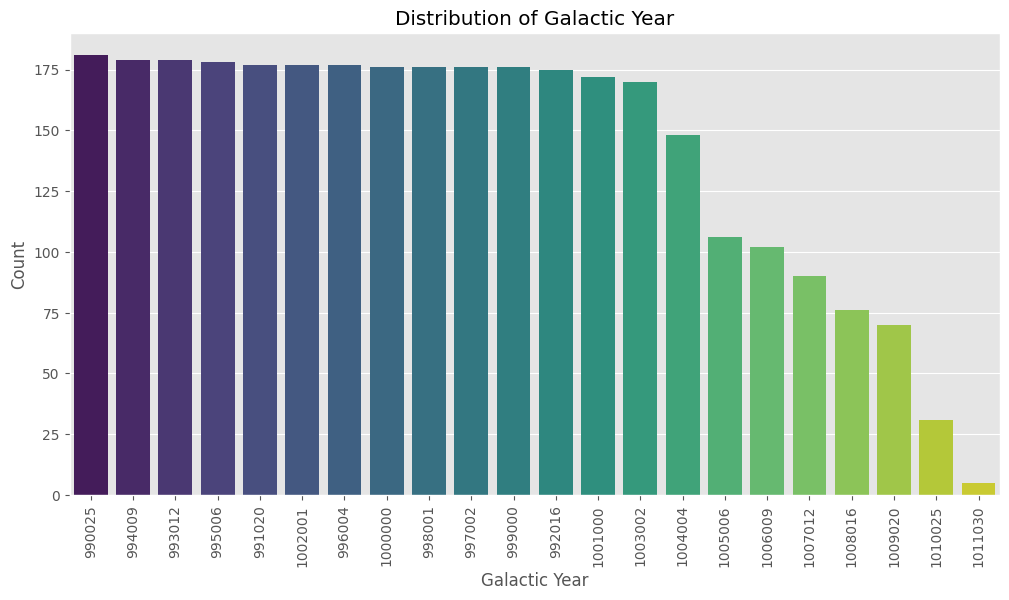

In [63]:
# Plotting the galactic year column
plt.figure(figsize=(12, 6))
sns.countplot(data=galaxies, x='galactic year', order=gal_year.index, palette='viridis')
plt.title('Distribution of Galactic Year')
plt.xlabel('Galactic Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [64]:
# Seeing the descriptive statistics of the train data
galaxies.describe()

,ID,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Well-Being Index
count,3097.000000,3.097000e+03,3096.000000,3096.000000,3069.000000,3069.000000,2968.000000,2742.000000,2716.000000,2716.000000,2678.000000,3097.000000
mean,157659.407168,9.984641e+05,0.863193,76.197777,31175.236021,0.819082,14.442264,10.058239,0.793514,0.731124,132.016588,0.082724
std,230716.474733,5.417848e+03,0.164595,10.539559,18574.375226,0.194201,3.622899,3.265167,0.176389,0.198845,50.738367,0.056014
min,10065.000000,9.900250e+05,0.227890,34.244062,-126.906521,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,0.031477
25%,38554.000000,9.940090e+05,0.749559,69.055828,19876.218060,0.672132,12.307716,7.482265,0.658223,0.582499,90.538437,0.049195
50%,67570.000000,9.980010e+05,0.899075,78.482889,26058.342360,0.821124,14.700321,10.129151,0.813372,0.748034,132.204365,0.058864
75%,95992.000000,1.003002e+06,0.985961,84.135993,36351.451720,0.962507,16.845018,12.593958,0.926053,0.881367,171.156043,0.087992
max,998085.000000,1.011030e+06,1.204456,99.593905,132861.542800,1.361883,25.303770,19.057648,1.186909,1.209059,278.786613,0.379857


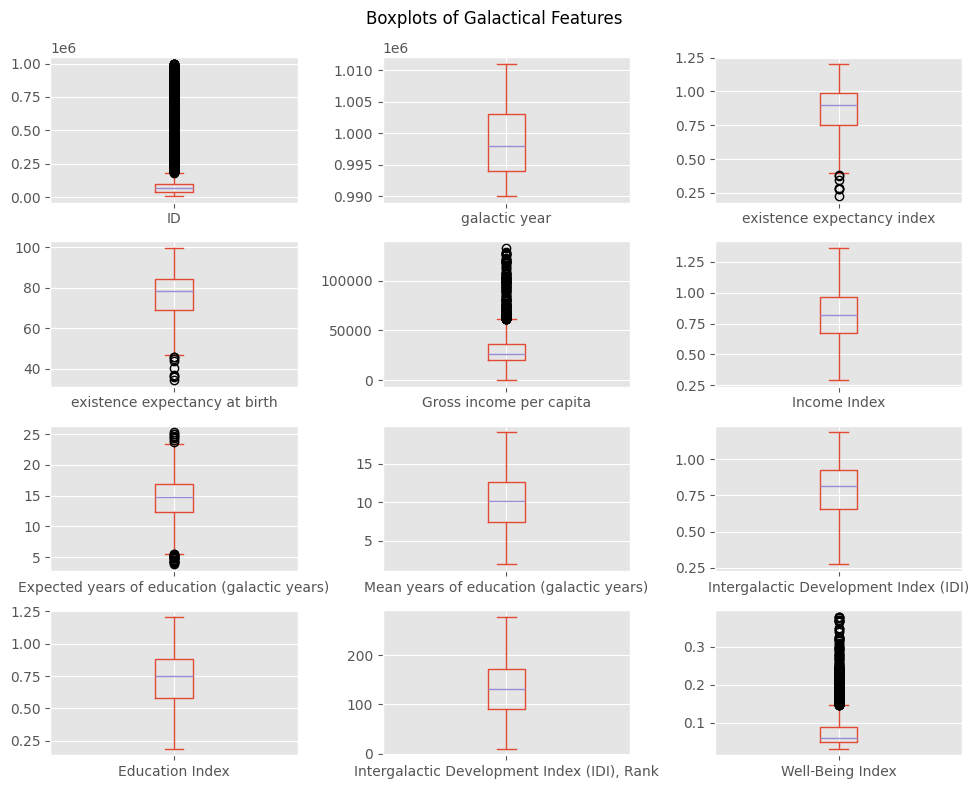

In [65]:
# Checking for outliers in the train data
galaxies.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(4, 3), figsize=(10, 8))
plt.style.use('ggplot')
plt.suptitle('Boxplots of Galactical Features')
plt.tight_layout()
plt.show()

- 6 out of 13 features have outliers, including the Well-being index.
- The Well-being index, ID and Gross Income per capita reports the highest number of outliers.

We will look into these a little later.



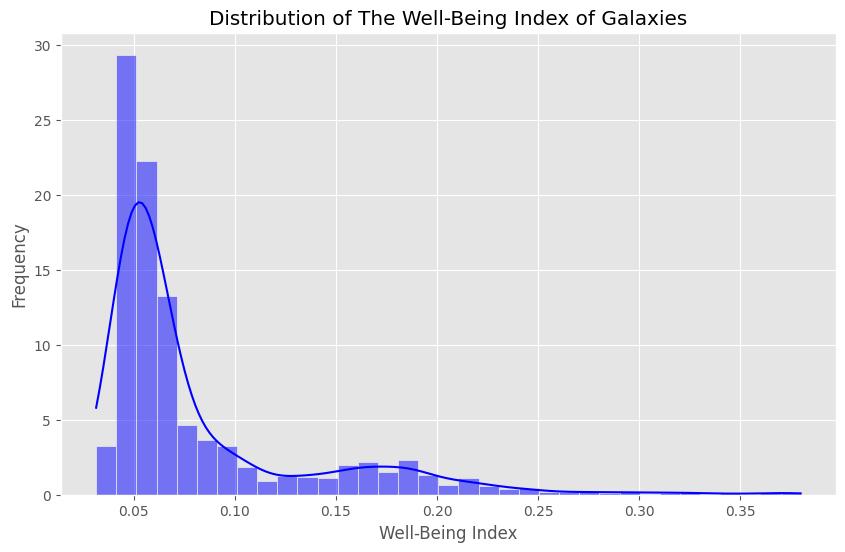

In [97]:
# Viewing the distribution of the Well-Being Index
plt.figure(figsize=(10, 6))
sns.histplot(galaxies['Well-Being Index'], bins=30, kde=True, color='blue', stat='density', binwidth=0.01)
plt.title('Distribution of The Well-Being Index of Galaxies')
plt.xlabel('Well-Being Index')
plt.ylabel('Frequency')
plt.show()

The distribution of the Well-Being Index is right-skewed, indicating that most galaxies have a lower well-being index centering around 0.05-0.07.

##### C. Multi-Variate Analysis

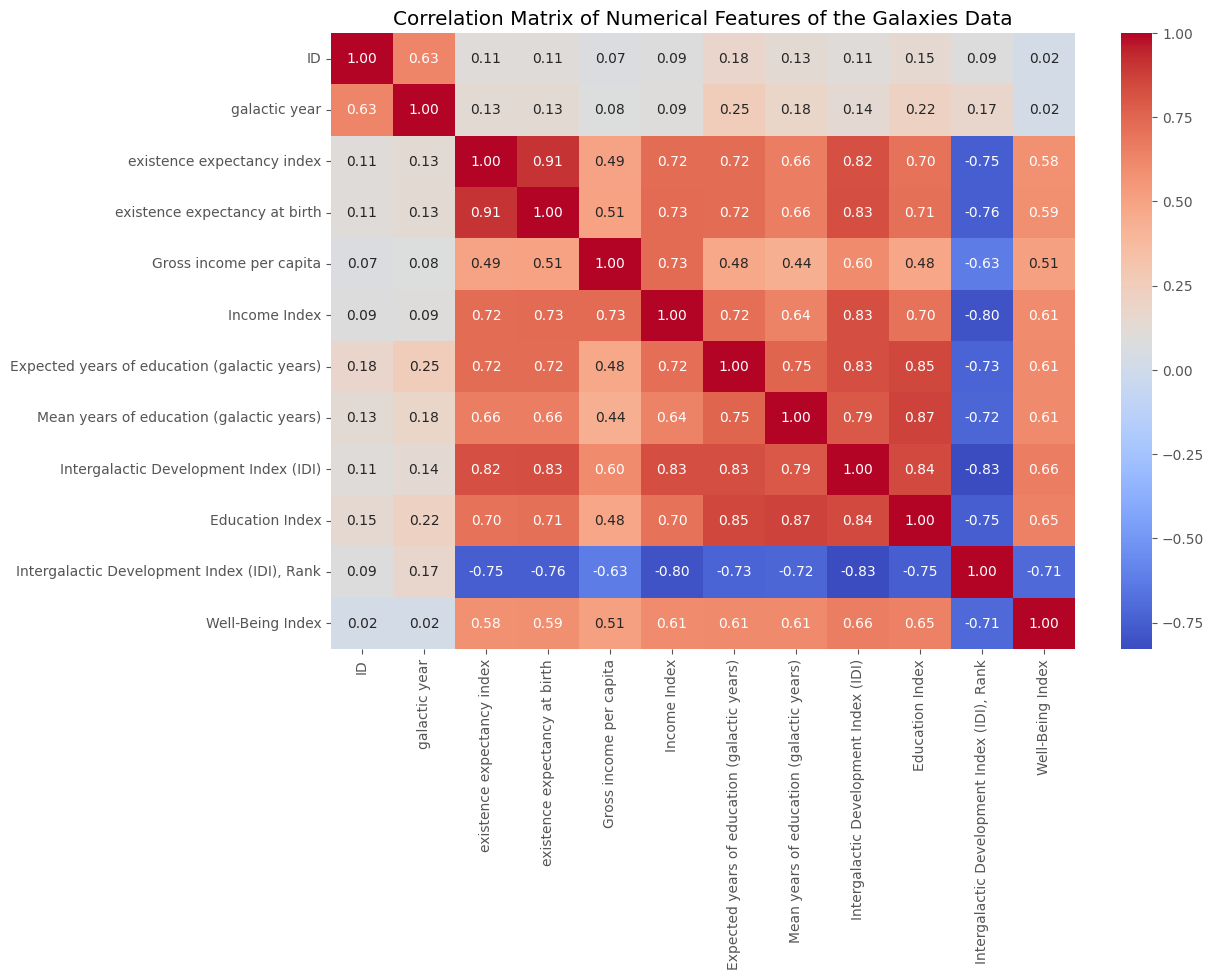

In [67]:
#plotting the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = galaxies.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') 
plt.title('Correlation Matrix of Numerical Features of the Galaxies Data')
plt.show()

Insights
- The ID and galactic year features are weakly positively correlated to all the other features apart from each other.
- The Intergalactic Development Index Rank is fairly negatively correlated to every other feature(apart from ID and galactic year).This means, the lower the rank (1,2,3...), the higher the well-being
- All features are positively correlated to each other apart from with the 'Intergalactic Development Index Rank
- The Well Being Index has a correlation range  between 0.58 and 0.66 on all other features apart from itself, ID and galactic year.
- The intergalactic development index rank is mostly correlated to the well-being index though the relationship is negative.

    galactic year  Well-Being Index
0          990025          0.081928
1          991020          0.082495
2          992016          0.082661
3          993012          0.082090
4          994009          0.082191
5          995006          0.082125
6          996004          0.081798
7          997002          0.081265
8          998001          0.082250
9          999000          0.082656
10        1000000          0.082894
11        1001000          0.083398
12        1002001          0.082953
13        1003002          0.082102
14        1004004          0.082764
15        1005006          0.082108
16        1006009          0.082800
17        1007012          0.081335
18        1008016          0.083240
19        1009020          0.085600
20        1010025          0.103898
21        1011030          0.127725


/var/folders/tr/7nczqy6957313cq459kdk1ch0000gn/T/ipykernel_87816/782764232.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gal_year_mean, x='galactic year', y='Well-Being Index', palette='viridis')


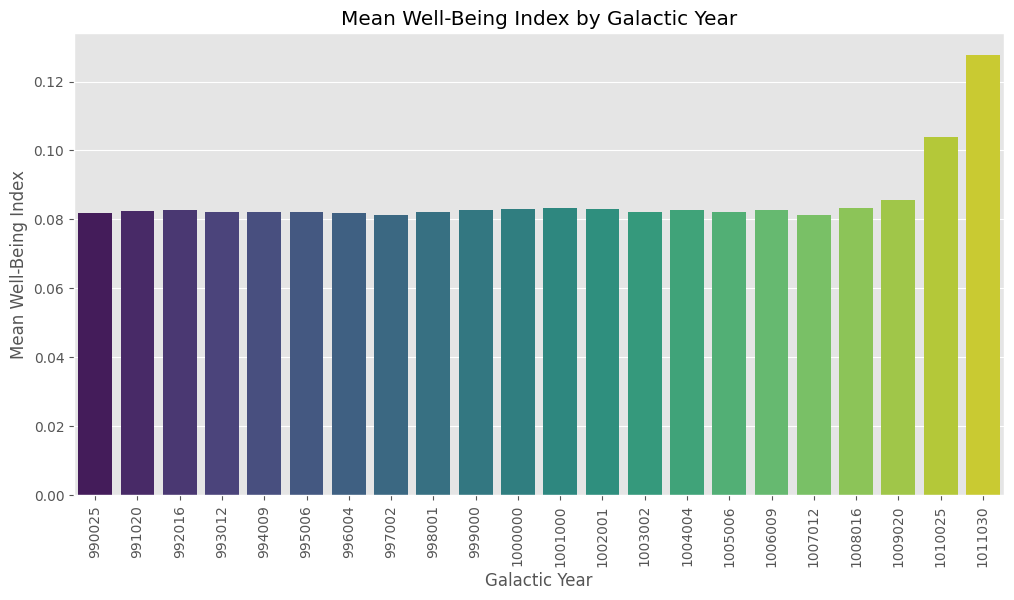

In [93]:
# Grouping galaxy by galactic year and calculating the mean Well-Being Index
gal_year_mean = galaxies.groupby('galactic year')['Well-Being Index'].mean().reset_index()
print(gal_year_mean)
# Plotting the mean Well-Being Index by galactic year
plt.figure(figsize=(12, 6))
sns.barplot(data=gal_year_mean, x='galactic year', y='Well-Being Index', palette='viridis')
plt.title('Mean Well-Being Index by Galactic Year')
plt.xlabel('Galactic Year')
plt.ylabel('Mean Well-Being Index')
plt.xticks(rotation=90)
plt.show()


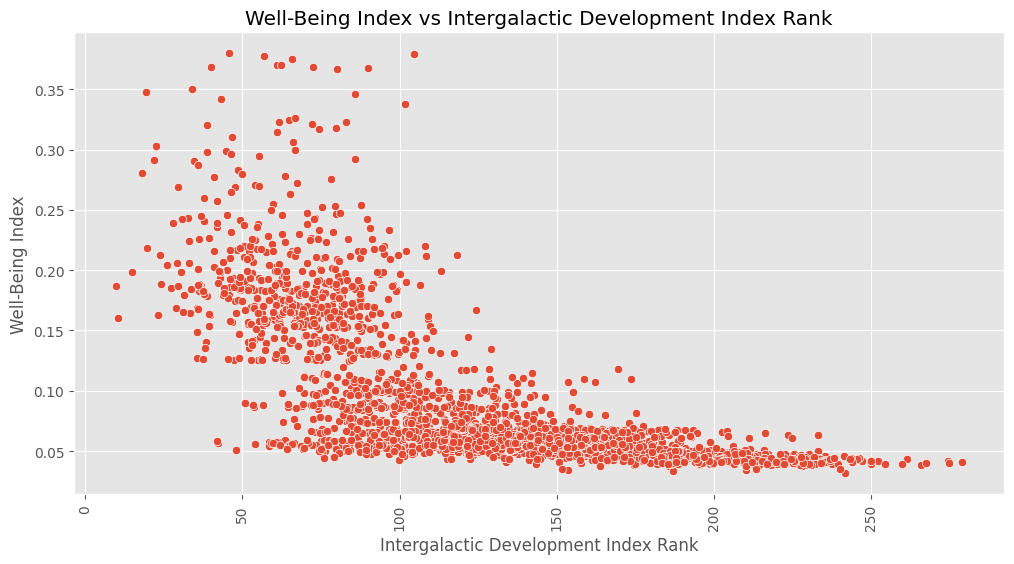

In [69]:
# Exploring the relationship between Intergalactic Development Index rank and Well-Being Index
plt.figure(figsize=(12, 6))
sns.scatterplot(data=galaxies, x="Intergalactic Development Index (IDI), Rank", y='Well-Being Index')
plt.title('Well-Being Index vs Intergalactic Development Index Rank')
plt.xlabel('Intergalactic Development Index Rank')
plt.ylabel('Well-Being Index')
plt.xticks(rotation=90)
plt.show()


- The relationship displayed above, though negative is not linear. Polynomial regression may help.
- It seems there may be other factors that cause the well-being index to center around 0.05 even with an increase in the ranking

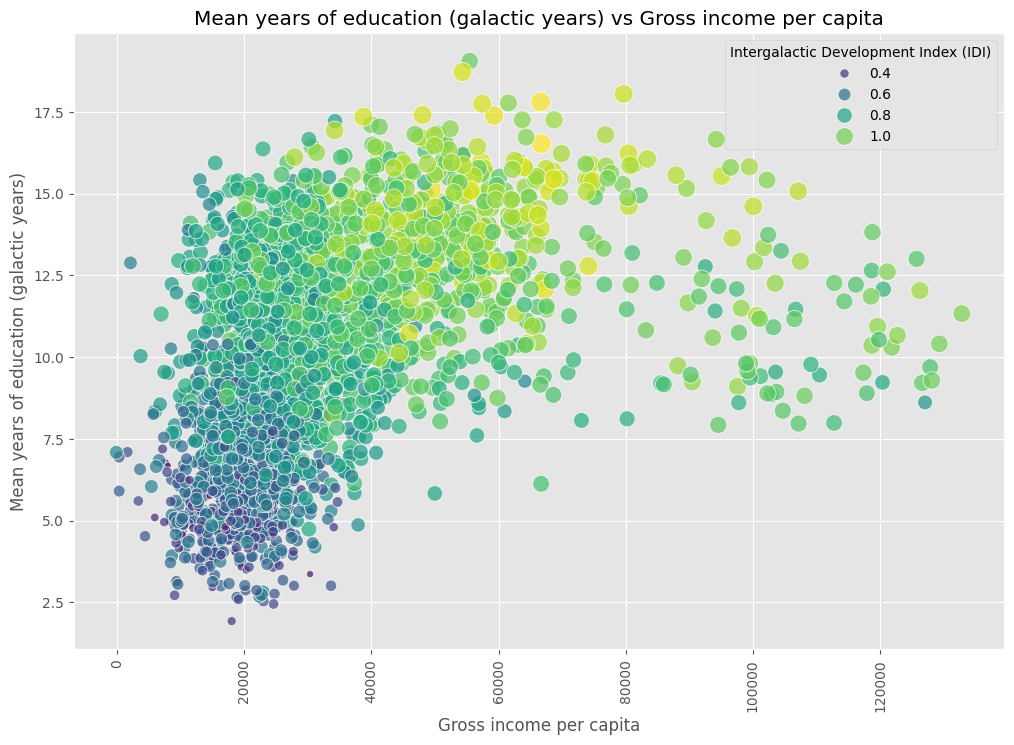

In [70]:
# Checking the relationship between Gross income per capita, Mean years of education (galactic years) and 
# their eventual Intergalactic Development Index (IDI)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=galaxies, x='Gross income per capita', y='Mean years of education (galactic years)',
                size='Intergalactic Development Index (IDI)', 
                hue='Intergalactic Development Index (IDI)', sizes=(20, 200), palette='viridis', alpha=0.7)
plt.title('Mean years of education (galactic years) vs Gross income per capita')
plt.xlabel('Gross income per capita')
plt.ylabel('Mean years of education (galactic years)')
plt.legend(title='Intergalactic Development Index (IDI)')
plt.xticks(rotation=90)
plt.show()

From the scatter plot we see that:
- Gross income per capita is positively correlated with the mean years of education of the galaxy.
- This pattern is also shown in the Integalactic Development Index.
- The galaxies with lower mean years of education, also had lower gross income per capita and Intergalactic Development Index
- Higher mean years of education (7.5 to 15) reported higher Intergalactic Development indices (0.8+) despite varying gross income per capita.
- Those with higher levels of mean education had the highest Intergalactic Development indices when their gross income was between 40000 - 80000


## 3. Data Preprocessing

##### A. Feature Engineering


In [71]:
# Dropping the categorical columns
galaxies = galaxies.drop(columns=['ID', 'galaxy'])
galaxies

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Well-Being Index
0,1002001,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,0.471400,247.196654,0.041404
1,999000,0.970048,80.924094,11409.94296,0.757218,15.869798,13.065734,0.807108,0.837559,137.299057,0.098777
2,993012,0.995540,82.441006,58774.29343,1.032429,17.545117,11.399711,0.973684,0.890396,74.709302,0.200747
3,995006,1.004362,75.635986,34960.41911,0.707776,13.578086,NaN,NaN,NaN,NaN,0.067170
4,996004,1.050627,83.412540,17073.45121,0.951402,13.518157,11.749071,0.965452,0.798000,141.210462,0.078351
...,...,...,...,...,...,...,...,...,...,...,...
3092,1006009,0.937222,84.487688,24971.04485,0.911724,11.789837,9.783680,0.848086,0.850300,NaN,0.050515
3093,1004004,0.942579,84.852778,55945.54506,1.128565,15.397120,10.018093,0.906435,0.739079,115.777726,0.094714
3094,1004004,1.013720,86.117546,17258.34503,0.872451,17.845618,8.781587,0.942878,0.768294,117.007212,0.057673
3095,1004004,0.545461,58.674229,11367.55522,0.586294,12.943574,6.244963,0.399272,0.551939,224.561525,0.043698


In [72]:
# Dropping the categorical columns and well-being index from the validation data
validation1 = validation.drop(columns=['ID', 'galaxy'])
validation1

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Well-Being Index
0,1004004,0.803915,82.718434,17299.57148,0.691448,16.083635,11.282011,0.715746,0.745786,191.852274,NaN
1,1005006,0.860011,73.682279,24971.71631,0.669550,12.858577,10.493260,0.727915,0.806982,172.983630,NaN
2,1006009,0.810644,68.456526,15943.82977,0.766118,14.236676,9.962169,0.757072,0.852921,180.488519,NaN
3,1015056,0.837170,68.742404,20952.63665,0.757196,14.281498,10.329880,0.759207,0.801123,186.040542,NaN
4,1004004,0.749034,72.093220,30068.14043,0.641228,12.510524,7.132999,0.673619,0.528564,155.296209,NaN
...,...,...,...,...,...,...,...,...,...,...,...
715,1015056,1.010563,92.515213,61890.59381,1.219435,18.016207,13.395910,1.020538,0.871133,99.716757,NaN
716,1003002,0.628426,58.772174,26523.82527,0.572390,9.186143,3.807712,0.525476,0.366503,226.243698,NaN
717,1004004,0.603825,58.301528,10659.49479,0.629569,7.827124,4.244244,0.615265,0.402917,246.407020,NaN
718,1005006,0.574464,53.416728,23157.55806,0.627428,9.626455,6.992821,0.464677,0.402599,214.937772,NaN


##### B. Imputing/filling null values

In [73]:
import sklearn as sklearn

In [74]:
from sklearn.impute import SimpleImputer
# we will use the median to fill the missing values since most of the columns are skewed
imputer = SimpleImputer(strategy='median')
# fitting the imputer on the train data
imputer.fit(galaxies)
# transforming the train and validation data
galaxies_imputed = pd.DataFrame(imputer.transform(galaxies), columns=galaxies.columns)
validation_imputed = pd.DataFrame(imputer.transform(validation1), columns=validation1.columns)

In [75]:
#Confirming null count
print('Train Data Null Count:', galaxies_imputed.isnull().sum().sum())
print('Validation Data Null Count:', validation_imputed.isnull().sum().sum())
print('Train Data Shape:', galaxies_imputed.shape)
print('Validation Data Shape:', validation_imputed.shape)

Train Data Null Count: 0
Validation Data Null Count: 0
Train Data Shape: (3097, 11)
Validation Data Shape: (720, 11)


In [76]:
galaxies_imputed.head()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Well-Being Index
0,1002001.0,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,0.471400,247.196654,0.041404
1,999000.0,0.970048,80.924094,11409.94296,0.757218,15.869798,13.065734,0.807108,0.837559,137.299057,0.098777
2,993012.0,0.995540,82.441006,58774.29343,1.032429,17.545117,11.399711,0.973684,0.890396,74.709302,0.200747
3,995006.0,1.004362,75.635986,34960.41911,0.707776,13.578086,10.129151,0.813372,0.748034,132.204365,0.067170
4,996004.0,1.050627,83.412540,17073.45121,0.951402,13.518157,11.749071,0.965452,0.798000,141.210462,0.078351


In [77]:
validation_imputed.head()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Well-Being Index
0,1004004.0,0.803915,82.718434,17299.57148,0.691448,16.083635,11.282011,0.715746,0.745786,191.852274,0.058864
1,1005006.0,0.860011,73.682279,24971.71631,0.669550,12.858577,10.493260,0.727915,0.806982,172.983630,0.058864
2,1006009.0,0.810644,68.456526,15943.82977,0.766118,14.236676,9.962169,0.757072,0.852921,180.488519,0.058864
3,1015056.0,0.837170,68.742404,20952.63665,0.757196,14.281498,10.329880,0.759207,0.801123,186.040542,0.058864
4,1004004.0,0.749034,72.093220,30068.14043,0.641228,12.510524,7.132999,0.673619,0.528564,155.296209,0.058864


In [78]:
# Dropping the Well-Being Index from the validation data, it was filled with an imputed constant.
validation_imputed = validation_imputed.drop(columns=['Well-Being Index'])

##### C. Train-Test Splitting

In [79]:
# Conducting the train-test split
from sklearn.model_selection import train_test_split
X = galaxies_imputed.drop(columns=['Well-Being Index'])
y = galaxies_imputed['Well-Being Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train shape:', X_train.shape)

X_train shape: (2167, 10)


##### D. Standardization/scaling

In [80]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fitting the scaler only on the split train data
scaler.fit(X_train)
# Transforming the split train, test and validation data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
validation_scaled = scaler.transform(validation_imputed)

## 4. Model Selection and Training
This is a regression problem since the outcomes are not categorical

##### A. Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
# Initializing the model
lr = LinearRegression()
# Fitting the model on the train data
lr.fit(X_train_scaled, y_train)
# Making predictions on the test data
y_pred_lr = lr.predict(X_test_scaled) # Resolving the x has feature names issue
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
# Calculating the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print('RMSE:', rmse)
print('R2 Score:', r2_score(y_test, y_pred_lr))

RMSE: 0.03808231513671111
R2 Score: 0.5500497882232408


##### B. Decision Tree Regression

In [82]:
from sklearn.tree import DecisionTreeRegressor
# Initializing the model
dt = DecisionTreeRegressor(random_state=42)
# Fitting the model on the train data
dt.fit(X_train_scaled, y_train)
# Making predictions on the test data
y_pred_dt = dt.predict(X_test_scaled)
# Evaluating the model
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print('RMSE:', rmse_dt)
print('R2 Score:', r2_score(y_test, y_pred_dt))

RMSE: 0.03790090220792539
R2 Score: 0.5543264380254103


##### C. Random Forest Regression

In [83]:
from sklearn.ensemble import RandomForestRegressor
# Initializing the model
rf = RandomForestRegressor(random_state=42)
# Fitting the model on the train data
rf.fit(X_train_scaled, y_train)
# Making predictions on the test data
y_pred_rf = rf.predict(X_test_scaled)
# Evaluating the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('RMSE:', rmse_rf)
print('R2 Score:', r2_score(y_test, y_pred_rf))

RMSE: 0.025216838894675613
R2 Score: 0.8027127300571374


In [84]:
# Using cross-validation to evaluate the model
from sklearn.model_selection import cross_val_score
# Performing cross-validation
scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
# Calculating the RMSE
rmse_cv = np.sqrt(-scores)
print('Cross-Validation RMSE:', rmse_cv.mean())


Cross-Validation RMSE: 0.025966704772150566


In [85]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
grid = {
    'n_estimators': [50, 100],
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 3],
    'max_features': [10, 20]
}
# Initializing the model
rf = RandomForestRegressor(random_state=42)
# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, error_score='raise')
# Fitting the model on the train data
grid_search.fit(X_train_scaled, y_train)
# Getting the best parameters
best_params = grid_search.best_params_
print('Best Parameters:', best_params)
# Getting the best estimator
best_rf = grid_search.best_estimator_
# Making predictions on the test data
y_pred_best_rf = best_rf.predict(X_test_scaled)
# Evaluating the model
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
print('RMSE:', rmse_best_rf)
print('R2 Score:', r2_score(y_test, y_pred_best_rf))    

Best Parameters: {'criterion': 'squared_error', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
RMSE: 0.02519836417484739
R2 Score: 0.8030017029843569


##### D. Gradient Boosting Regression

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
# Initializing the model
gb = GradientBoostingRegressor(random_state=42)
# Fitting the model on the train data
gb.fit(X_train_scaled, y_train)
# Making predictions on the test data
y_pred_gb = gb.predict(X_test_scaled)
# Evaluating the model
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print('RMSE:', rmse_gb)
print('R2 Score:', r2_score(y_test, y_pred_gb))
print('Cross-Validation RMSE:', np.sqrt(-cross_val_score(gb, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean()))

RMSE: 0.02639823230244181
R2 Score: 0.783794136399981
Cross-Validation RMSE: 0.026581995699947108


##### E. Lasso Regression

In [87]:
from sklearn.linear_model import Lasso
# Initializing the model
lasso = Lasso(random_state=42, alpha=0.1)
# Fitting the model on the train data
lasso.fit(X_train_scaled, y_train)
# Making predictions on the test data
y_pred_lasso = lasso.predict(X_test_scaled)
# Evaluating the model
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print('RMSE:', rmse_lasso)
print('R2 Score:', r2_score(y_test, y_pred_lasso))


RMSE: 0.05677613944428437
R2 Score: -0.00011396871893620819


##### F. Polynomial Regression

In [88]:
# Poly Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
# Initializing the model
poly = PolynomialFeatures(degree=2)
# Creating a pipeline
pipeline = make_pipeline(poly, LinearRegression())
# Fitting the model on the train data
pipeline.fit(X_train_scaled, y_train)
# Making predictions on the test data
y_pred_poly = pipeline.predict(X_test_scaled)
# Evaluating the model
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print('RMSE:', rmse_poly)
print('R2 Score:', r2_score(y_test, y_pred_poly))

RMSE: 0.027492234430885037
R2 Score: 0.7655026967996502


## 5. Prediction

In [89]:
# Using the best model to make predictions on the validation data
y_pred_validation = best_rf.predict(validation_scaled)
# Creating a DataFrame to store the predictions
predictions = pd.DataFrame({'ID': validation['ID'], 'Pred_well_being_index': y_pred_validation})
# Saving the predictions to a CSV file
predictions.to_csv('linet_gathuka_DSA.csv', index=False)
predictions.head()

,ID,Pred_well_being_index
0,886447,0.051496
1,687564,0.054827
2,494935,0.047779
3,378919,0.049343
4,421878,0.047189


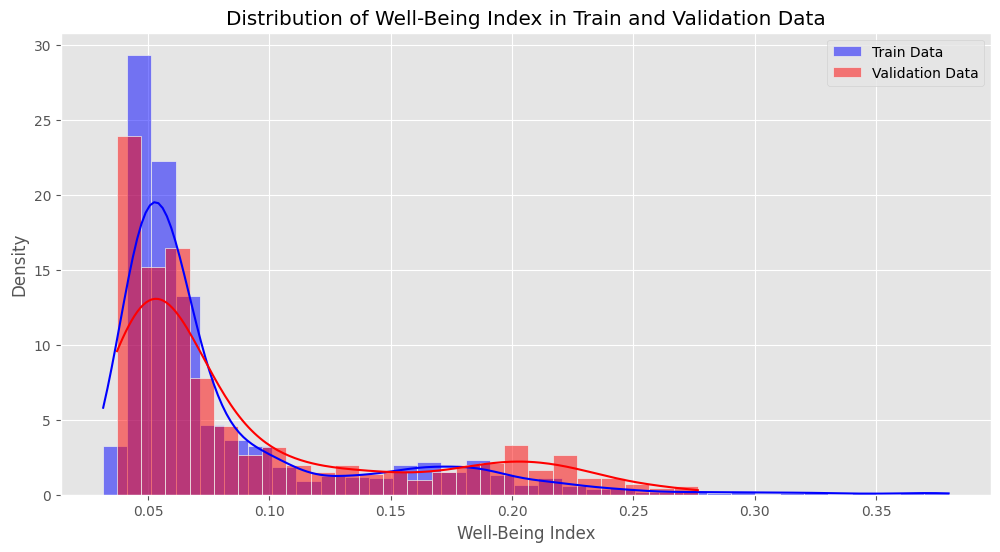

In [98]:
# Does the distribution of the Well-Being Index in the validation data match that of the train data?
plt.figure(figsize=(12, 6))
sns.histplot(galaxies['Well-Being Index'], bins=30, kde=True, color='blue', stat='density', binwidth=0.01, label='Train Data')
sns.histplot(predictions['Pred_well_being_index'], bins=30, kde=True, color='red', stat='density', binwidth=0.01, label='Validation Data')
plt.title('Distribution of Well-Being Index in Train and Validation Data')
plt.xlabel('Well-Being Index')
plt.ylabel('Density')
plt.legend()
plt.show()


Insights:
- The distribution of the validation data follows the same skewness pattern of the train data.
- Most of the observations of the well-being index of the validation data-set are also centered between 0.5 just like the train data.

Access the notebook, environment and libraries here: To https://github.com/gathukalinet/dsc_scholar_test.git